In [1]:
%pip install -q matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from IPython.display import Audio
import wave
import matplotlib.pyplot as plt

In this example, we are going to use an ideal lowpass filter to remove high frequency record player noise from an old audio recording.

In [3]:
Audio('data/freischutz.wav')

In [4]:
def read_sound(name):
    sound = wave.open(name, 'r')
    #assert sound.getsampwidth() == 2
    x = np.array(np.frombuffer(sound.readframes(-1), dtype=np.int16), dtype=float)
    sr = sound.getframerate()
    return x, sr

def write_sound(name, x, sr):
    sound = wave.open(name, 'w')
    sound.setnchannels(1)
    sound.setsampwidth(2)
    sound.setframerate(sr)
    sound.writeframes(np.array(x, dtype=np.int16))
    

In [5]:
def filter_and_compare(title, filter_func):
    x, sr = read_sound('data/freischutz.wav')
    nu = len(x)
    T0 = nu/sr

    freq = np.fft.rfftfreq(nu, 2/sr)
    ak = np.fft.rfft(x)

    ak_filt = filter_func(freq, ak)
    pow_dB = 20*np.log10(np.abs(ak)/nu)
    pow_dB_low = 20*np.log10(np.abs(ak_filt)/nu)

    plt.figure()
    plt.title(title)
    plt.plot(freq/1e3, pow_dB, '.', label='original', alpha=1)
    plt.plot(freq/1e3, pow_dB_low, '.', label='filter', alpha=0.5)
    plt.legend(loc='lower right')
    plt.xlabel('kHz')
    plt.ylabel('power, dB')
    plt.gca().set_xlim(0, 5);
    plt.grid()


    x_filt = np.fft.irfft(ak_filt)
    write_sound('data/freischutz.filt.wav', x_filt, sr)
    return Audio('data/freischutz.filt.wav')



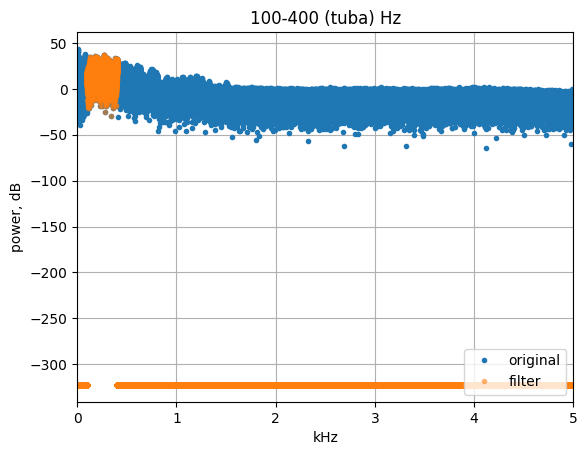

In [6]:
filter_and_compare('100-400 (tuba) Hz', lambda freq, ak: np.where(np.logical_and(freq > 100, freq < 400), ak, 1e-10))